In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

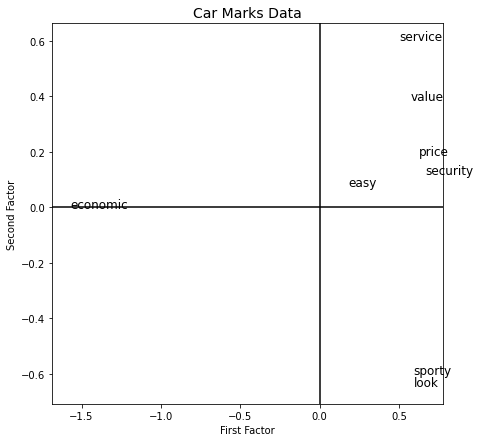

In [2]:
xdat = pd.read_csv("carmean.dat", sep = "\s+", header=None)
x = xdat.iloc[:, 1:]
x.columns = ["economic", "service", "value", "price", "look", "sporty", 
             "security", "easy"]

r = x.corr()
m = r.copy()
np.fill_diagonal(m.values, 0)
psi = np.ones((8, 8))
np.fill_diagonal(psi, 1 - np.abs(m).max())

ee, vv = np.linalg.eig(r - psi)
vv = vv[:, 1:3]
q1 = np.sqrt(ee[1])*vv[:, 0]
q2 = np.sqrt(ee[2])*vv[:, 1]


fig, ax = plt.subplots(figsize = (7, 7))
ax.scatter(-q1, q2, c = "w")

for i in range(len(x.columns)):
    ax.text(-q1[i], q2[i], x.columns[i], fontsize = 12)

ax.axvline(0, c = "k")
ax.axhline(0, c = "k")

ax.set_xlabel("First Factor")
ax.set_ylabel("Second Factor")
plt.title("Car Marks Data", fontsize = 14)

plt.show()